<div style="text-align: right"> Karina Chiñas Fuentes </div>
<div style="text-align: right"> Matrikelnummer: 3578458 </div>
<div style="text-align: right"> 27/04/22 </div>

**Universtiät Stuttgart: Mathematik und Physik**

# Physikalisches Fortgeschrittenenpraktikum
## Optical Pumping


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sstyle = "seaborn-poster"
plt.style.use(sstyle)
plt.rc('font',family = 'serif')

In [2]:
N  = 11 # Turns on each side
Rb = 0.1639 # m 
Ir = 0.329 # A: residual measured current
Br = round((8.991e-3)*Ir*N/Rb,3) # Gauss: residual magnetic field

def B(vec):
    """
    Returns magnetic field given the currrent. 
    Notice that the residual magnetic field is substracted.
    The returned vector has its values rounded to 3 digits.
    """
    Iv = np.array(vec)
    Bv = (8.991e-3)*Iv*N/Rb - np.array([Br])
    return np.around(Bv,3)

def get_linreg(x_vec,y_vec):
    """
    Getting a linear regression: y(x) = m*x + b, from data.
    Returns parameters m, b.
    """
    x = np.array(x_vec).reshape(-1,1)
    y = np.array(y_vec)
    model = LinearRegression().fit(x, y)
    m, b = model.coef_, model.intercept_
    return m,b

In [3]:
"""
PART II: collection of data
Note: 0.5 V peak/peak 
"""

freqs = [50,75,100,125,150] # kHz

# Measured current, given the input freq.
# RF == 150 kHz
I_150 = [0.672, 0.872]
# RF == 50 kHz
I_50 = [0.436, 0.498]
# RF == 75 kHz
I_75 = [0.483, 0.582]
# RF == 100 kHz
I_100 = [0.558,0.680]
# RF == 125 kHz
I_125 = [0.615,0.759]


I_Rb87 = [I_50[0], I_75[0], I_100[0], I_125[0] ,I_150[0]]; B_Rb87 = B(I_Rb87)
I_Rb85 = [I_50[1], I_75[1], I_100[1], I_125[1] ,I_150[1]]; B_Rb85 = B(I_Rb85)

Parameters for Rb-87: m = [412.35649448]  b = -127.95067014757447
Parameters for Rb-85: m = [269.46938129]  b = -82.75413438860448


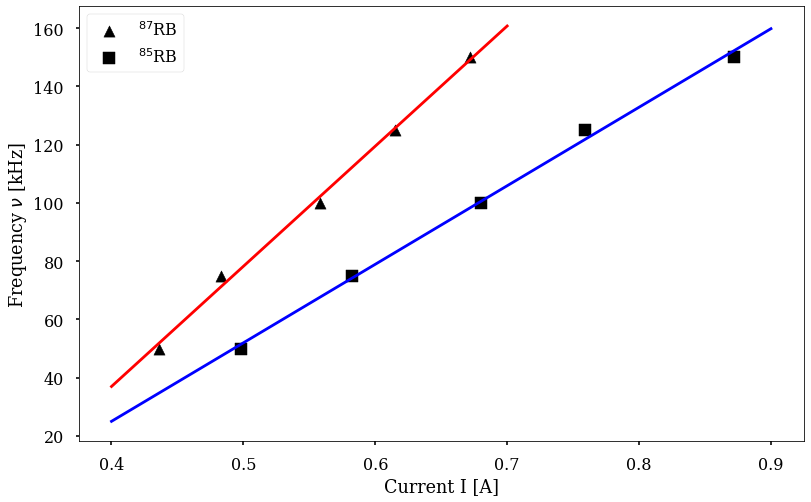

In [4]:
# Analysis for current
xx0, xx1 = np.linspace(0.4,0.7), np.linspace(0.4,0.9)
m87, b87 = get_linreg(I_Rb87,freqs)
m85, b85 = get_linreg(I_Rb85,freqs)

plt.figure(figsize=(13,8))
plt.scatter(I_Rb87,freqs, c = "k", marker= "^", label = "$^{87}$RB")
plt.scatter(I_Rb85,freqs, c = "k", marker= "s", label = "$^{85}$RB")
plt.plot(xx0, m87*xx0+b87,c = "r")#, label = "m $\\sim$ 412, b $\\sim$ -128")
plt.plot(xx1, m85*xx1+b85,c = "b")#, label = "m $\\sim$ 269, b $\\sim$ -82.8")
plt.xlabel("Current I [A]")
plt.ylabel("Frequency $\\nu$ [kHz]")
plt.legend();

print(f"Parameters for Rb-87: m = {m87}  b = {b87}\nParameters for Rb-85: m = {m85}  b = {b85}")

In [5]:
# Error in g_F
m = round((m87/m85)[0],3)
((m - 1.5)/1.5)*100

2.0000000000000018

Parameters for Rb-87: m = [680.23670751]  b = 8.440139169739467
Parameters for Rb-85: m = [447.47869455]  b = 5.939978405336973


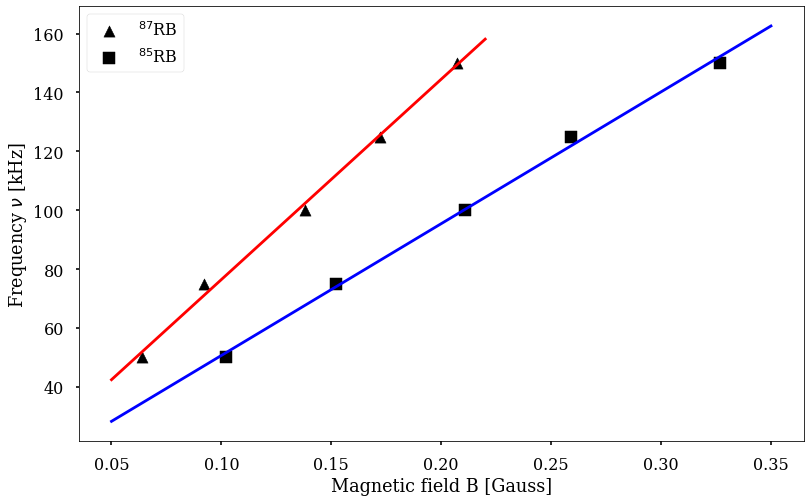

In [6]:
# Analysis for magnetic field
xx0, xx1 = np.linspace(0.05,0.22), np.linspace(0.05,0.35)
m87, b87 = get_linreg(B_Rb87,freqs)
m85, b85 = get_linreg(B_Rb85,freqs)

plt.figure(figsize=(13,8))
plt.scatter(B_Rb87,freqs, c = "k", marker= "^", label = "$^{87}$RB")
plt.scatter(B_Rb85,freqs, c = "k", marker= "s", label = "$^{85}$RB")
plt.plot(xx0, m87*xx0+b87,c = "r")#, label = "m $\\sim$ 412, b $\\sim$ -128")
plt.plot(xx1, m85*xx1+b85,c = "b")#, label = "m $\\sim$ 269, b $\\sim$ -82.8")
plt.xlabel("Magnetic field B [Gauss]")
plt.ylabel("Frequency $\\nu$ [kHz]")
plt.legend();

print(f"Parameters for Rb-87: m = {m87}  b = {b87}\nParameters for Rb-85: m = {m85}  b = {b85}")